In [72]:
import pandas as pd

In [73]:
%matplotlib inline

In [74]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [75]:
mnist = tf.keras.datasets.mnist

In [76]:
mnist

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from '/root/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/api/_v1/keras/datasets/mnist/__init__.py'>

In [77]:
(train_digits,train_labels),(test_digit,test_labels)=mnist.load_data()

In [78]:
def display_digit(digit):
    plt.imshow(digit.reshape(28,28),cmap="Greys",interpolation='nearest')

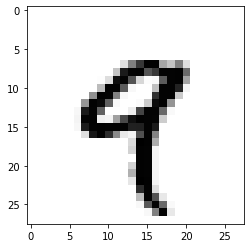

In [79]:
display_digit(train_digits[4])

In [80]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [81]:
tf.reset_default_graph()

In [82]:
train_digit_pl=tf.placeholder("float",[None,784])

In [83]:
test_digit_pl=tf.placeholder("float",[784])

In [84]:
def get_majority(label,indices):
    predicted_label=[]
    for i in indices:
        predicted_label.append(labels[i])
    predicted_label=np.array(predicted_label)
    print(predicted_label)
    count=np.bincount(predicted_label)
    return np.argmax(count)

In [85]:
l1_dist=tf.abs(tf.subtract(train_digit_pl,test_digit_pl))


In [86]:
dist_l1=tf.reduce_sum(l1_dist,axis=1)

In [87]:
pred_knn_l1=tf.nn.top_k(tf.negative(dist_l1),k=1)

In [88]:
accuarcy=0


In [89]:
init=tf.global_variables_initializer()

In [92]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(test_digit)):
        _, indices=sess.run(pred_knn_l1,feed_dict={train_digit_pl:train_digits,test_digit_pl:test_digit[i,:]})
        predict_label=get_majority(train_labels,indices)
        print("Test",i ,"Prediction",predict_label,"True label",test_labels[i])
        if predict_label == test_labels[i]:
            accuarcy+=1./len(test_digit)
    print("Accuarcy",accuarcy)

ValueError: Cannot feed value of shape (60000, 28, 28) for Tensor 'Placeholder:0', which has shape '(?, 784)'